# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key

## Step 2: Download the Kaggle dataset using the kaggle python library

### Install packages

In [6]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     |████████████████████████████████| 1.7 MB 27.7 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
     |████████████████████████████████| 946 kB 24.9 MB/s            
  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.1.0
    Uninstalling setuptools-58.1.0:
      Successfully uninstalled setuptools-58.1.0
     |████████████████████████████████| 46.9 MB 175 kB/s             
     |████████████████████████████████| 8.6 MB 51.4 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080039 sha256=4ab9dc3793bca87ef4bb4ce60132dbf13d89a258129955579d73630ce0495009
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df73511fde9af8aa747217ac8824e662037ba9a8
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.0
    Uninsta

### Setup Kaggle API Key

In [7]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [11]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "tejasshanbhag14"
kaggle_key = "a6f36ba52a5682307c3682342e17a2d0"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [12]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 6.41MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [13]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [17]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv',parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [20]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [21]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [22]:
predictor = TabularPredictor(label="count",eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns": ["casual", "registered"]})\
                                                                                .fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20211102_112830/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211102_112830/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 11
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3093.83 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of availa

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844
[6000]	train_set's rmse: 106.085	valid_set's rmse: 126.71


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3000]	train_set's rmse: 114.615	valid_set's rmse: 133.509
[4000]	train_set's rmse: 111.249	valid_set's rmse: 133.472
[5000]	train_set's rmse: 108.455	valid_set's rmse: 133.281


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.01	valid_set's rmse: 139.355
[2000]	train_set's rmse: 117.819	valid_set's rmse: 138.312
[3000]	train_set's rmse: 113.4	valid_set's rmse: 137.886
[4000]	train_set's rmse: 110.032	valid_set's rmse: 137.758


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.47	valid_set's rmse: 135.412


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.18	valid_set's rmse: 137.579
[2000]	train_set's rmse: 117.782	valid_set's rmse: 136.664
[3000]	train_set's rmse: 113.447	valid_set's rmse: 136.246
[4000]	train_set's rmse: 109.982	valid_set's rmse: 136.227


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.641	valid_set's rmse: 132.484


	-134.0883	 = Validation score   (root_mean_squared_error)
	44.7s	 = Training   runtime
	2.37s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 346.17s of the 546.21s of remaining time.
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argu

[1000]	train_set's rmse: 96.0217	valid_set's rmse: 123.249


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 94.7479	valid_set's rmse: 135.635


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.3055	valid_set's rmse: 132.087


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.1635	valid_set's rmse: 131.521


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-132.2864	 = Validation score   (root_mean_squared_error)
	12.65s	 = Training   runtime
	0.48s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 331.13s of the 531.17s of remaining time.
	-118.4567	 = Validation score   (root_mean_squared_error)
	7.02s	 = Training   runtime

### Review AutoGluon's training run with ranking of models that did the best.

In [23]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -114.816175       7.032043  530.180696                0.000813           0.383163            3       True         19
1   NeuralNetFastAI_BAG_L2 -115.473584       6.252469  476.055976                0.372184         103.741430            2       True         17
2          CatBoost_BAG_L2 -116.230378       5.917287  402.151107                0.037002          29.836561            2       True         15
3        LightGBMXT_BAG_L2 -116.338354       6.091355  382.646798                0.211070          10.332252            2       True         12
4          LightGBM_BAG_L2 -116.737179       5.959583  379.511418                0.079298           7.196872            2       True         13
5           XGBoost_BAG_L2 -117.424195       5.965799  378.366379         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGB

### Create predictions from test dataset

In [25]:
predictions = predictor.predict(test)
predictions.head()

0     97.397110
1     90.679871
2     90.694794
3    107.823029
4    107.734680
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [26]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      210.676270
std       129.698807
min        -6.922371
25%       105.277466
50%       193.823608
75%       296.953247
max       661.158203
Name: count, dtype: float64

In [27]:
# How many negative values do we have?
predictions[predictions<0]

3393   -6.922371
5551   -1.402941
Name: count, dtype: float32

In [28]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [30]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [31]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 566kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [33]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2021-11-02 11:48:27  first raw submission  complete  1.39194      1.39194       


New Score of `1.39194`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

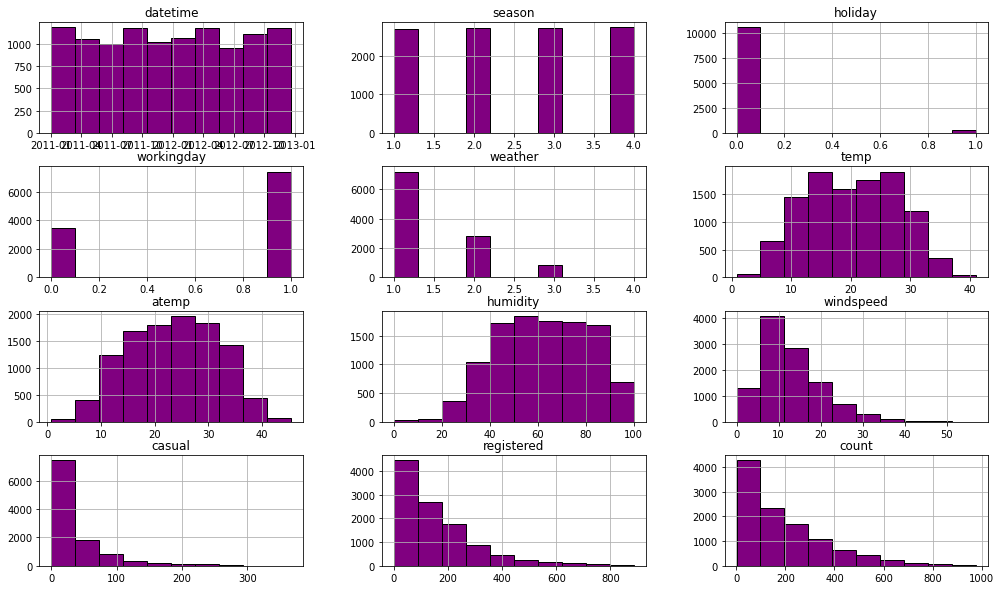

In [43]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train.hist(figsize = (17,10),color='purple',edgecolor='black')
plt.show()

We can see that we have a date column. Hence we can derive the following features from it
- year
- month
- day
- hour

In [45]:
# create features for training data
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour


test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [47]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [48]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


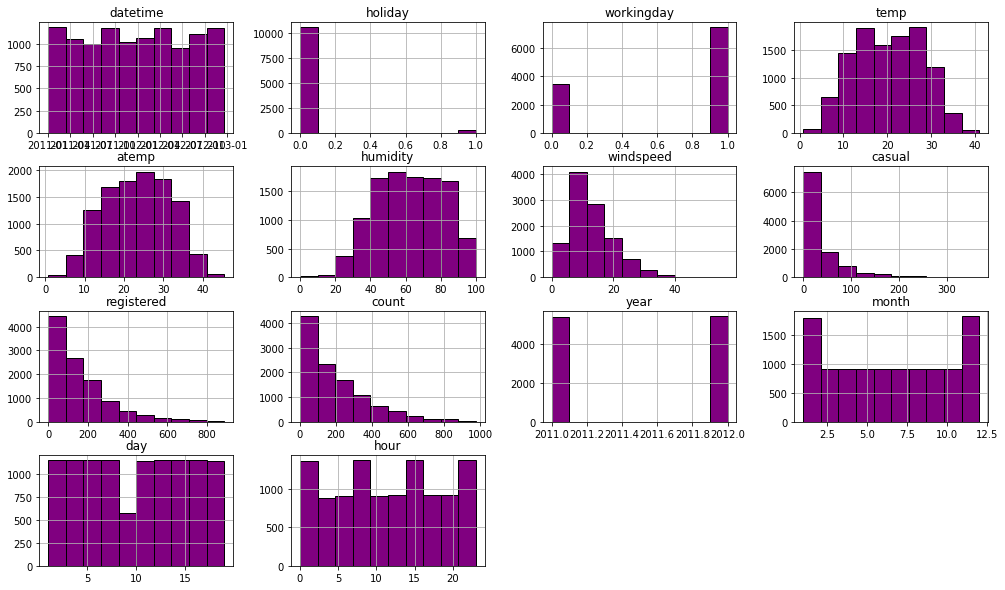

In [49]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train.hist(figsize = (17,10),color='purple',edgecolor='black')
plt.show()

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: category(2), dateti

## Step 5: Rerun the model with the same settings as before, just with more features

In [51]:
predictor_new_features = TabularPredictor(label="count",eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns": ["casual", "registered"]})\
                                                                                .fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20211102_122150/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211102_122150/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 15
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2206.11 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of availa

[1000]	train_set's rmse: 30.8186	valid_set's rmse: 38.4291
[2000]	train_set's rmse: 25.4239	valid_set's rmse: 36.1393
[3000]	train_set's rmse: 22.5686	valid_set's rmse: 35.6903
[4000]	train_set's rmse: 20.5877	valid_set's rmse: 35.5711
[5000]	train_set's rmse: 19.0435	valid_set's rmse: 35.5486


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.3019	valid_set's rmse: 41.0917
[2000]	train_set's rmse: 25.4089	valid_set's rmse: 38.7923
[3000]	train_set's rmse: 22.682	valid_set's rmse: 38.0445
[4000]	train_set's rmse: 20.7477	valid_set's rmse: 37.6701
[5000]	train_set's rmse: 19.2301	valid_set's rmse: 37.5143
[6000]	train_set's rmse: 18.0161	valid_set's rmse: 37.3559
[7000]	train_set's rmse: 16.9715	valid_set's rmse: 37.2906
[8000]	train_set's rmse: 16.0611	valid_set's rmse: 37.2206
[9000]	train_set's rmse: 15.2683	valid_set's rmse: 37.1952
[10000]	train_set's rmse: 14.5678	valid_set's rmse: 37.1924


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.8968	valid_set's rmse: 35.5721
[2000]	train_set's rmse: 25.8631	valid_set's rmse: 34.288
[3000]	train_set's rmse: 23.0637	valid_set's rmse: 34.1613


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.1963	valid_set's rmse: 41.0073
[2000]	train_set's rmse: 25.1657	valid_set's rmse: 39.5208
[3000]	train_set's rmse: 22.4714	valid_set's rmse: 38.891
[4000]	train_set's rmse: 20.6602	valid_set's rmse: 38.6141
[5000]	train_set's rmse: 19.2024	valid_set's rmse: 38.3924
[6000]	train_set's rmse: 18.0244	valid_set's rmse: 38.232
[7000]	train_set's rmse: 16.9892	valid_set's rmse: 38.0679
[8000]	train_set's rmse: 16.0734	valid_set's rmse: 37.9926
[9000]	train_set's rmse: 15.292	valid_set's rmse: 37.9346
[10000]	train_set's rmse: 14.5874	valid_set's rmse: 37.8583


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.7161	valid_set's rmse: 38.2675
[2000]	train_set's rmse: 25.5034	valid_set's rmse: 36.7964
[3000]	train_set's rmse: 22.7183	valid_set's rmse: 36.6083


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.3783	valid_set's rmse: 42.1922
[2000]	train_set's rmse: 25.4027	valid_set's rmse: 40.825
[3000]	train_set's rmse: 22.6044	valid_set's rmse: 40.6565
[4000]	train_set's rmse: 20.6399	valid_set's rmse: 40.551


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.6785	valid_set's rmse: 38.6888
[2000]	train_set's rmse: 25.6628	valid_set's rmse: 35.913
[3000]	train_set's rmse: 22.8607	valid_set's rmse: 35.0407
[4000]	train_set's rmse: 20.8954	valid_set's rmse: 34.7444
[5000]	train_set's rmse: 19.3693	valid_set's rmse: 34.6106
[6000]	train_set's rmse: 18.0937	valid_set's rmse: 34.5086
[7000]	train_set's rmse: 17.0039	valid_set's rmse: 34.5219


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.7847	valid_set's rmse: 40.0936
[2000]	train_set's rmse: 25.4609	valid_set's rmse: 38.335
[3000]	train_set's rmse: 22.6799	valid_set's rmse: 37.7931
[4000]	train_set's rmse: 20.8023	valid_set's rmse: 37.6372
[5000]	train_set's rmse: 19.2946	valid_set's rmse: 37.4755
[6000]	train_set's rmse: 18.0187	valid_set's rmse: 37.3536
[7000]	train_set's rmse: 16.9566	valid_set's rmse: 37.3147
[8000]	train_set's rmse: 16.0353	valid_set's rmse: 37.2951
[9000]	train_set's rmse: 15.2295	valid_set's rmse: 37.2903
[10000]	train_set's rmse: 14.5042	valid_set's rmse: 37.3442


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.2598	valid_set's rmse: 40.7273
[2000]	train_set's rmse: 25.2682	valid_set's rmse: 39.8782
[3000]	train_set's rmse: 22.5407	valid_set's rmse: 39.8429


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 31.0398	valid_set's rmse: 37.6854
[2000]	train_set's rmse: 25.8317	valid_set's rmse: 35.4668
[3000]	train_set's rmse: 23.0887	valid_set's rmse: 34.8136
[4000]	train_set's rmse: 21.1229	valid_set's rmse: 34.5371
[5000]	train_set's rmse: 19.5767	valid_set's rmse: 34.3685
[6000]	train_set's rmse: 18.3516	valid_set's rmse: 34.2276
[7000]	train_set's rmse: 17.2755	valid_set's rmse: 34.2726


	-36.8251	 = Validation score   (root_mean_squared_error)
	94.2s	 = Training   runtime
	5.46s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 288.05s of the 488.06s of remaining time.
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.1363	valid_set's rmse: 35.556
[2000]	train_set's rmse: 15.5229	valid_set's rmse: 35.4489


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.0431	valid_set's rmse: 36.9388
[2000]	train_set's rmse: 15.5393	valid_set's rmse: 36.1223
[3000]	train_set's rmse: 12.2068	valid_set's rmse: 35.9677
[4000]	train_set's rmse: 9.97753	valid_set's rmse: 35.9639


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4253	valid_set's rmse: 33.0295


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4591	valid_set's rmse: 38.0987
[2000]	train_set's rmse: 15.6967	valid_set's rmse: 37.1129
[3000]	train_set's rmse: 12.2044	valid_set's rmse: 36.7212
[4000]	train_set's rmse: 9.95476	valid_set's rmse: 36.6786


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.43	valid_set's rmse: 37.371
[2000]	train_set's rmse: 15.5136	valid_set's rmse: 36.986


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.6619	valid_set's rmse: 35.9541


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.0051	valid_set's rmse: 35.6024
[2000]	train_set's rmse: 15.4015	valid_set's rmse: 34.9824


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.3287	valid_set's rmse: 36.3245
[2000]	train_set's rmse: 15.6834	valid_set's rmse: 35.8282
[3000]	train_set's rmse: 12.2992	valid_set's rmse: 35.5694
[4000]	train_set's rmse: 10.1773	valid_set's rmse: 35.5318


	-36.5863	 = Validation score   (root_mean_squared_error)
	34.95s	 = Training   runtime
	1.4s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 247.46s of the 447.47s of remaining time.
	-41.3243	 = Validation score   (root_mean_squared_error)
	9.78s	 = Training   runtime
	0.41s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 234.87s of the 434.88s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 181.82s of the 381.83s of remaining time.
	-41.0311	 = Validation score   (root_mean_squared_error)
	3.97s	 = Training   runtime
	0.4s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 174.85s of the 374.87s of remaining time.
	Ran out of time, stopping training early. (Stopping on epoch 27)
	Ran out of time, stopping training early. (Stopping on epoch 28)
	Ran out of time, stopping training early. (

In [52]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.168415      12.166303  487.987923                0.000839           0.328420            3       True         16
1      WeightedEnsemble_L2  -35.313202       7.666115  283.881350                0.000804           0.429819            2       True          9
2          LightGBM_BAG_L2  -35.584514      10.706283  316.629411                0.109720           7.242852            2       True         11
3          CatBoost_BAG_L2  -35.670602      10.662909  346.290102                0.066345          36.903542            2       True         13
4     ExtraTreesMSE_BAG_L2  -35.694670      11.083451  316.367647                0.486888           6.981087            2       True         14
5   NeuralNetFastAI_BAG_L2  -35.988758      11.024860  409.799209         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.92163053871576,
  'KNeighborsDist_BAG_L1': -119

In [54]:
# Remember to set all negative values to zero

new_predictions = predictor_new_features.predict(test)
new_predictions[new_predictions<0] = 0

In [55]:
new_predictions.head()

0    12.889737
1     5.163289
2     3.663111
3     3.630481
4     4.041388
Name: count, dtype: float32

In [57]:
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
# Same submitting predictions
submission_new_features["count"] = new_predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [58]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 619kB/s]
Successfully submitted to Bike Sharing Demand

In [59]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2021-11-02 12:34:08  new features          complete  0.47027      0.47027       
submission.csv               2021-11-02 11:48:27  first raw submission  complete  1.39194      1.39194       


#### New Score of `0.47027`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [61]:
predictor_new_hpo = TabularPredictor(label="count",eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns": ["casual", "registered"]})\
                    .fit(train_data=train,time_limit=1000,presets="best_quality",keep_only_best =True,num_stack_levels =2,num_bag_folds=3)

No path specified. Models will be saved in: "AutogluonModels/ag-20211102_124534/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 1000s
AutoGluon will save models to "AutogluonModels/ag-20211102_124534/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 15
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1963.38 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of avail

[1000]	train_set's rmse: 29.4753	valid_set's rmse: 40.8957
[2000]	train_set's rmse: 23.8291	valid_set's rmse: 39.335
[3000]	train_set's rmse: 20.7725	valid_set's rmse: 39.0574
[4000]	train_set's rmse: 18.6885	valid_set's rmse: 39.0011


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.0274	valid_set's rmse: 41.284
[2000]	train_set's rmse: 24.3227	valid_set's rmse: 39.0767
[3000]	train_set's rmse: 21.2245	valid_set's rmse: 38.5377
[4000]	train_set's rmse: 19.1036	valid_set's rmse: 38.3601
[5000]	train_set's rmse: 17.4885	valid_set's rmse: 38.2327
[6000]	train_set's rmse: 16.1276	valid_set's rmse: 38.2162


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.3306	valid_set's rmse: 40.4043
[2000]	train_set's rmse: 23.9846	valid_set's rmse: 39.3258
[3000]	train_set's rmse: 21.0325	valid_set's rmse: 39.167
[4000]	train_set's rmse: 18.9632	valid_set's rmse: 39.1014


	-38.756	 = Validation score   (root_mean_squared_error)
	21.17s	 = Training   runtime
	3.37s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 416.11s of the 971.61s of remaining time.
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.6179	valid_set's rmse: 38.2568


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.7996	valid_set's rmse: 37.8732
[2000]	train_set's rmse: 13.7554	valid_set's rmse: 37.6398


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.1575	valid_set's rmse: 39.1485


	-38.2441	 = Validation score   (root_mean_squared_error)
	8.14s	 = Training   runtime
	1.21s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 405.69s of the 961.19s of remaining time.
	-41.3243	 = Validation score   (root_mean_squared_error)
	9.78s	 = Training   runtime
	0.42s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 393.19s of the 948.69s of remaining time.
	-37.7111	 = Validation score   (root_mean_squared_error)
	99.22s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 293.4s of the 848.91s of remaining time.
	-41.0311	 = Validation score   (root_mean_squared_error)
	4.07s	 = Training   runtime
	0.41s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 286.48s of the 841.99s of remaining time.
	-48.9292	 = Validation score   (root_mean_squared_error)
	39.23s	 = Training   runtime
	0.25s	 = Validation 

[1000]	train_set's rmse: 6.57546	valid_set's rmse: 38.1798


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 6.46671	valid_set's rmse: 37.6603


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 6.42465	valid_set's rmse: 39.4722
[2000]	train_set's rmse: 2.58345	valid_set's rmse: 39.4067


	Ran out of time, early stopping on iteration 2104. Best iteration is:
	[1899]	train_set's rmse: 2.81432	valid_set's rmse: 39.405
	-38.4089	 = Validation score   (root_mean_squared_error)
	18.1s	 = Training   runtime
	1.32s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 553.84s of remaining time.
	-36.2095	 = Validation score   (root_mean_squared_error)
	0.56s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 9 L2 models ...
Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 368.69s of the 553.14s of remaining time.
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python

In [62]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -36.061491      10.945369  587.241735                0.000831           0.461393            3       True         16
1          CatBoost_BAG_L2  -36.363904       9.056636  433.058219                0.026155          10.092103            2       True         12
2     ExtraTreesMSE_BAG_L2  -36.447029       9.525326  430.686639                0.494846           7.720523            2       True         13
3    NeuralNetMXNet_BAG_L2  -36.967278      10.346070  564.379024                1.315590         141.412908            2       True         15
4           XGBoost_BAG_L2  -37.090989       9.107947  427.554808                0.077467           4.588692            2       True         14
5          CatBoost_BAG_L1  -37.711131       0.129529   99.224751         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L2': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.92163053871576,
  'KNeighborsDist_BAG_L1

In [72]:
# Remember to set all negative values to zero
new_predictions_hyp = predictor_new_hpo.predict(test)
new_predictions_hyp[new_predictions_hyp<0] = 0

In [74]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
# Same submitting predictions
submission_new_hpo["count"] = new_predictions_hyp
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [75]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 749kB/s]
Successfully submitted to Bike Sharing Demand

In [76]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2021-11-02 13:07:11  new features with hyperparameters  complete  0.46396      0.46396       
submission_new_features.csv  2021-11-02 12:34:08  new features                       complete  0.47027      0.47027       
submission.csv               2021-11-02 11:48:27  first raw submission               complete  1.39194      1.39194       


#### New Score of `0.46396`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

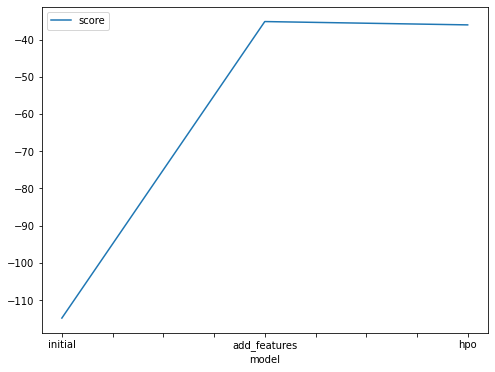

In [98]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)

first_model = predictor.leaderboard(silent=True)['score_val'][0]
second_model = predictor_new_features.leaderboard(silent=True)['score_val'][0]
final_model = predictor_new_hpo.leaderboard(silent=True)['score_val'][0]


fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [first_model,second_model, final_model]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.jpeg')

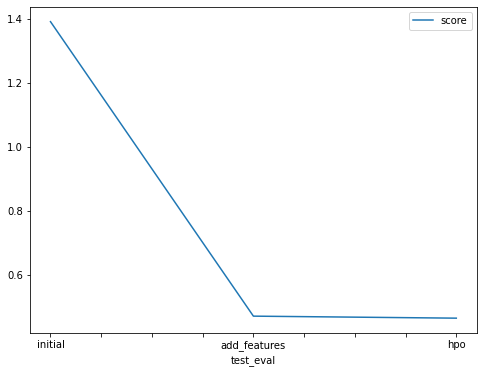

In [99]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.39194, 0.47027, 0.46396]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.jpeg')

### Hyperparameter table

In [100]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "num_bag_folds": [0, 0, 3],
    "num_stack_levels": [0, 0, 2],
    "time_limit": [600, 600, 1000],
    "score": [1.39194, 0.47027, 0.46396]
})

,model,num_bag_folds,num_stack_levels,time_limit,score
0,initial,0,0,600,1.39194
1,add_features,0,0,600,0.47027
2,hpo,3,2,1000,0.46396
